## NOVA Exercise - README


### Prerequisites

* python 3
* Jupiter Notebook

Windows-
* Anaconda

Following libraries needs to be installed in order to run the project-

* sklearn
* pandas
* matplotlib
* numpy
* re


### Installing

Windows-
Install all packages using the conda-install command as following-

```
conda install -c anaconda pandas 
```


Ubuntu-
```
sudo apt-get install python3-pandas 
```

PyPI-
```
pip3 install pandas 
```


And repeat on all libraries from the 'Prerequisites' if the libraies are not installed on your local computer (or conda virtual env)


## Running the Notebook

Windows-
Open you Anaconda Navigator and Launch the Jupiter Notebook application (make sure you are on the right virtual env)

Ubuntu-
Open a Terminal window and run following command-
```
jupiter notebook 
```


The notebook will open. You can either run one cell at a time or click 'Cell' --> 'Run All'

In [1]:
# pearson's correlation feature selection for numeric input and numeric output
#from sklearn.datasets import make_regression
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
import pandas as pd
#import scipy
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import re
#import numpy
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [2]:
df=pd.read_csv('C:/Users/yotam hermon/Desktop/ANOVA_DS_Escersize/df_data.csv')

In [3]:
# remove any (inf, -inf, nan) values
# df = df.replace([np.inf, -np.inf], np.nan).dropna()

# find the correlation between target other features
dfcorr = df.corr()["Parameter"] # pearson correlation test for feature selection
dfcorr = dfcorr.abs() 
dfcorr = dfcorr.where(dfcorr >= 0.25) # choosing features that correlate from 0.25 (absulote value) and more

<AxesSubplot:>

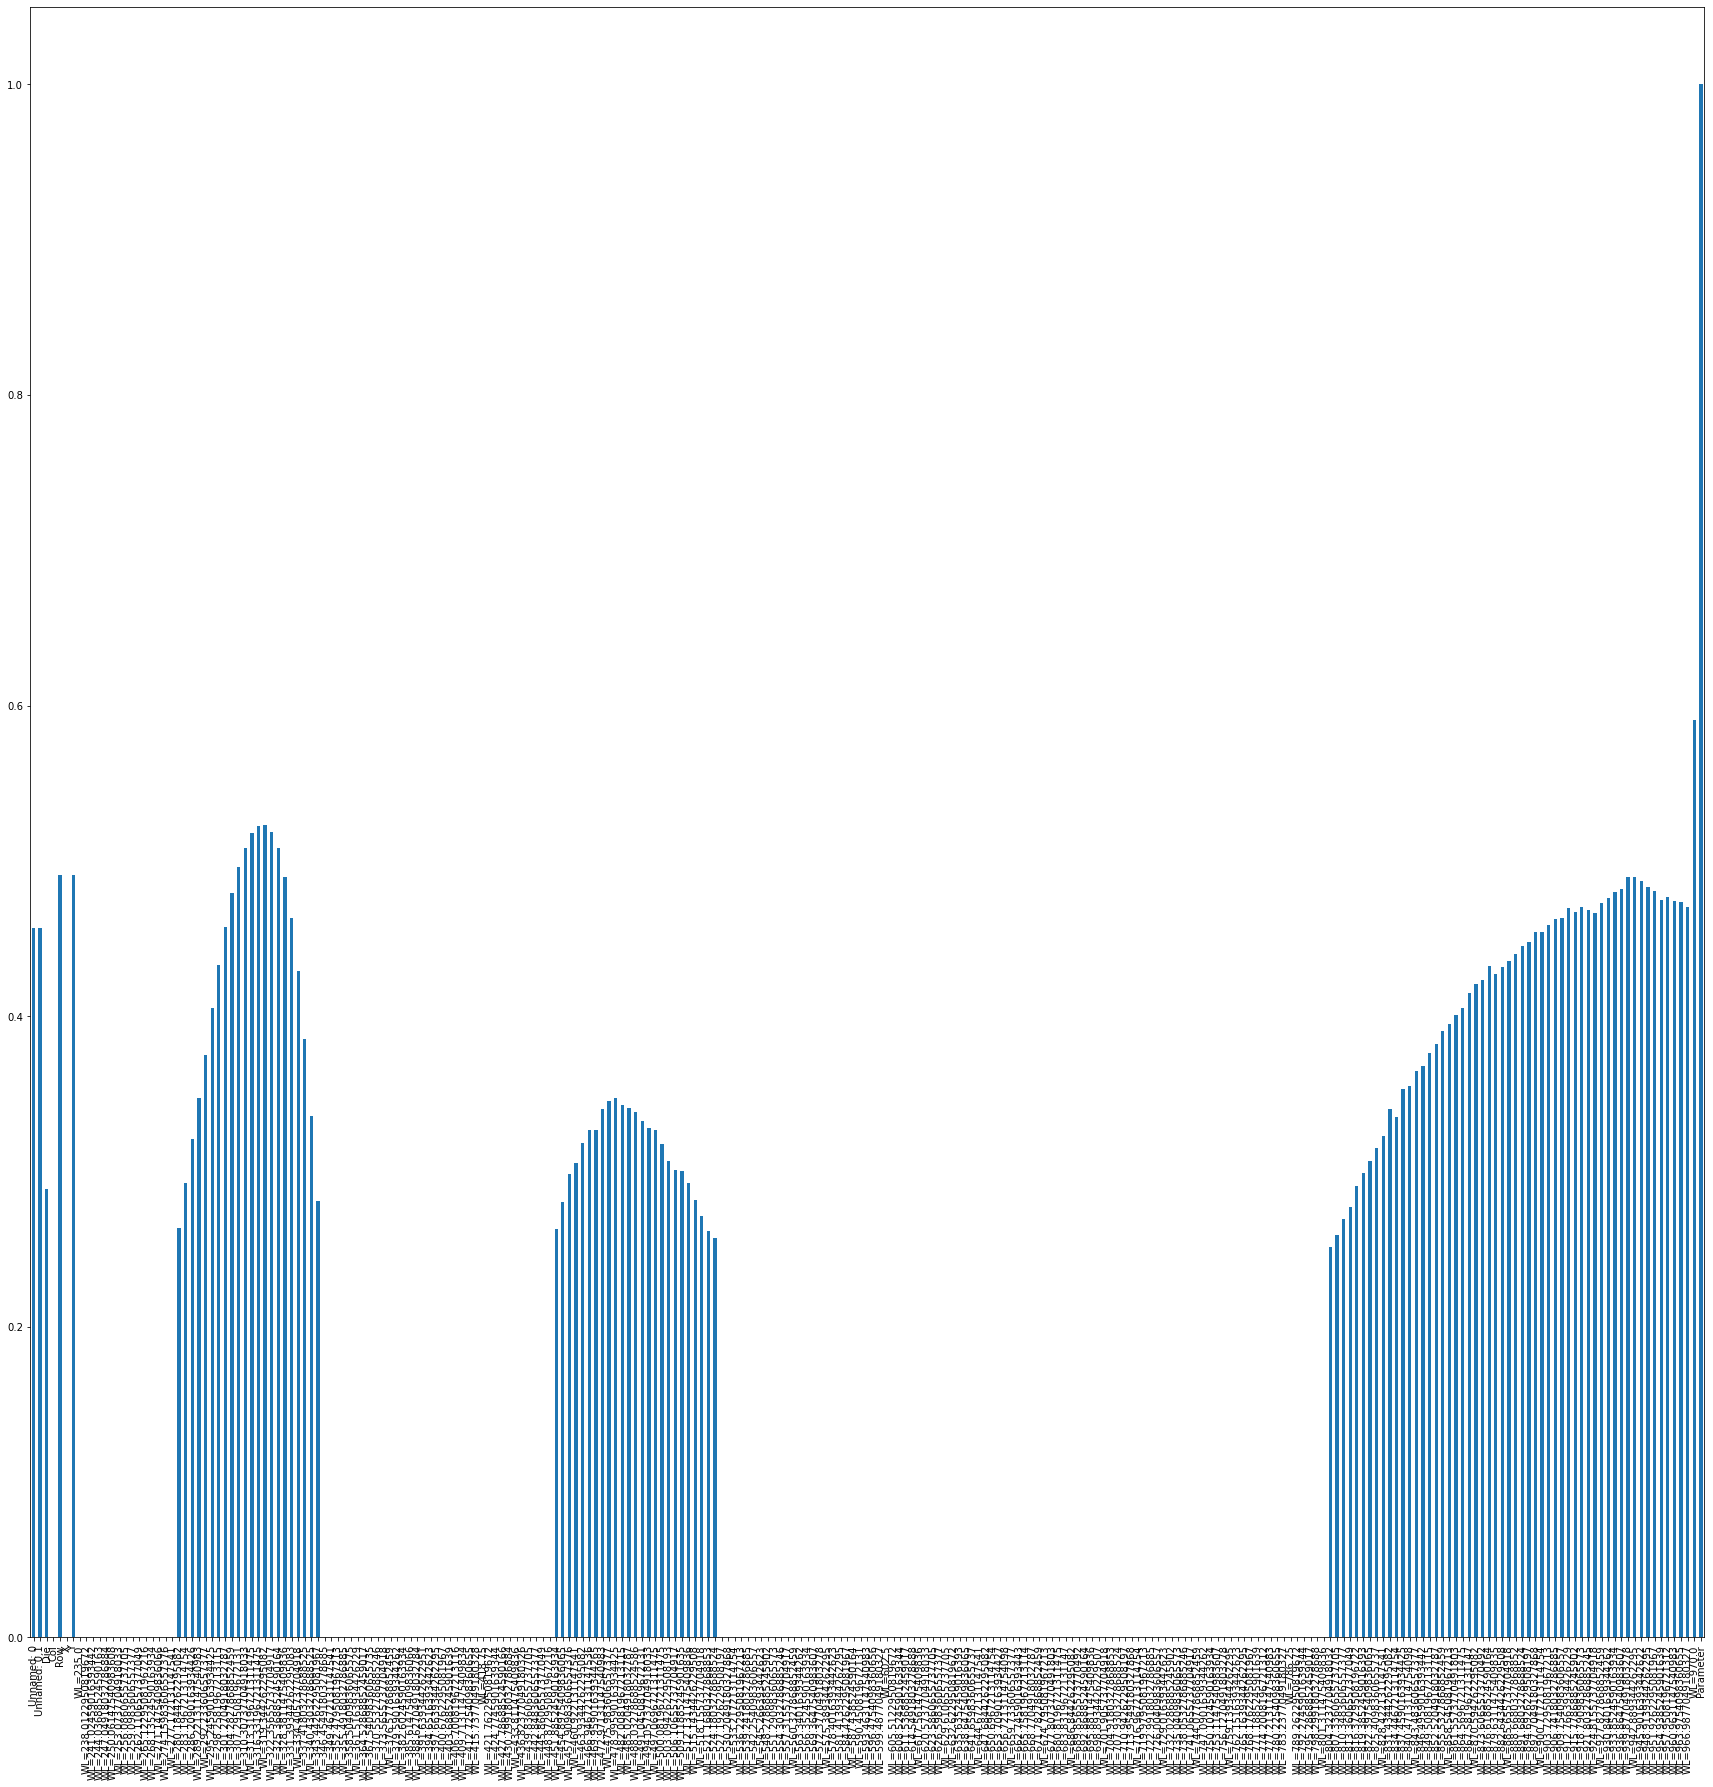

In [4]:
dfcorr.plot(kind='bar',figsize=(30,30)) # plot feature correlations using histogram

<AxesSubplot:>

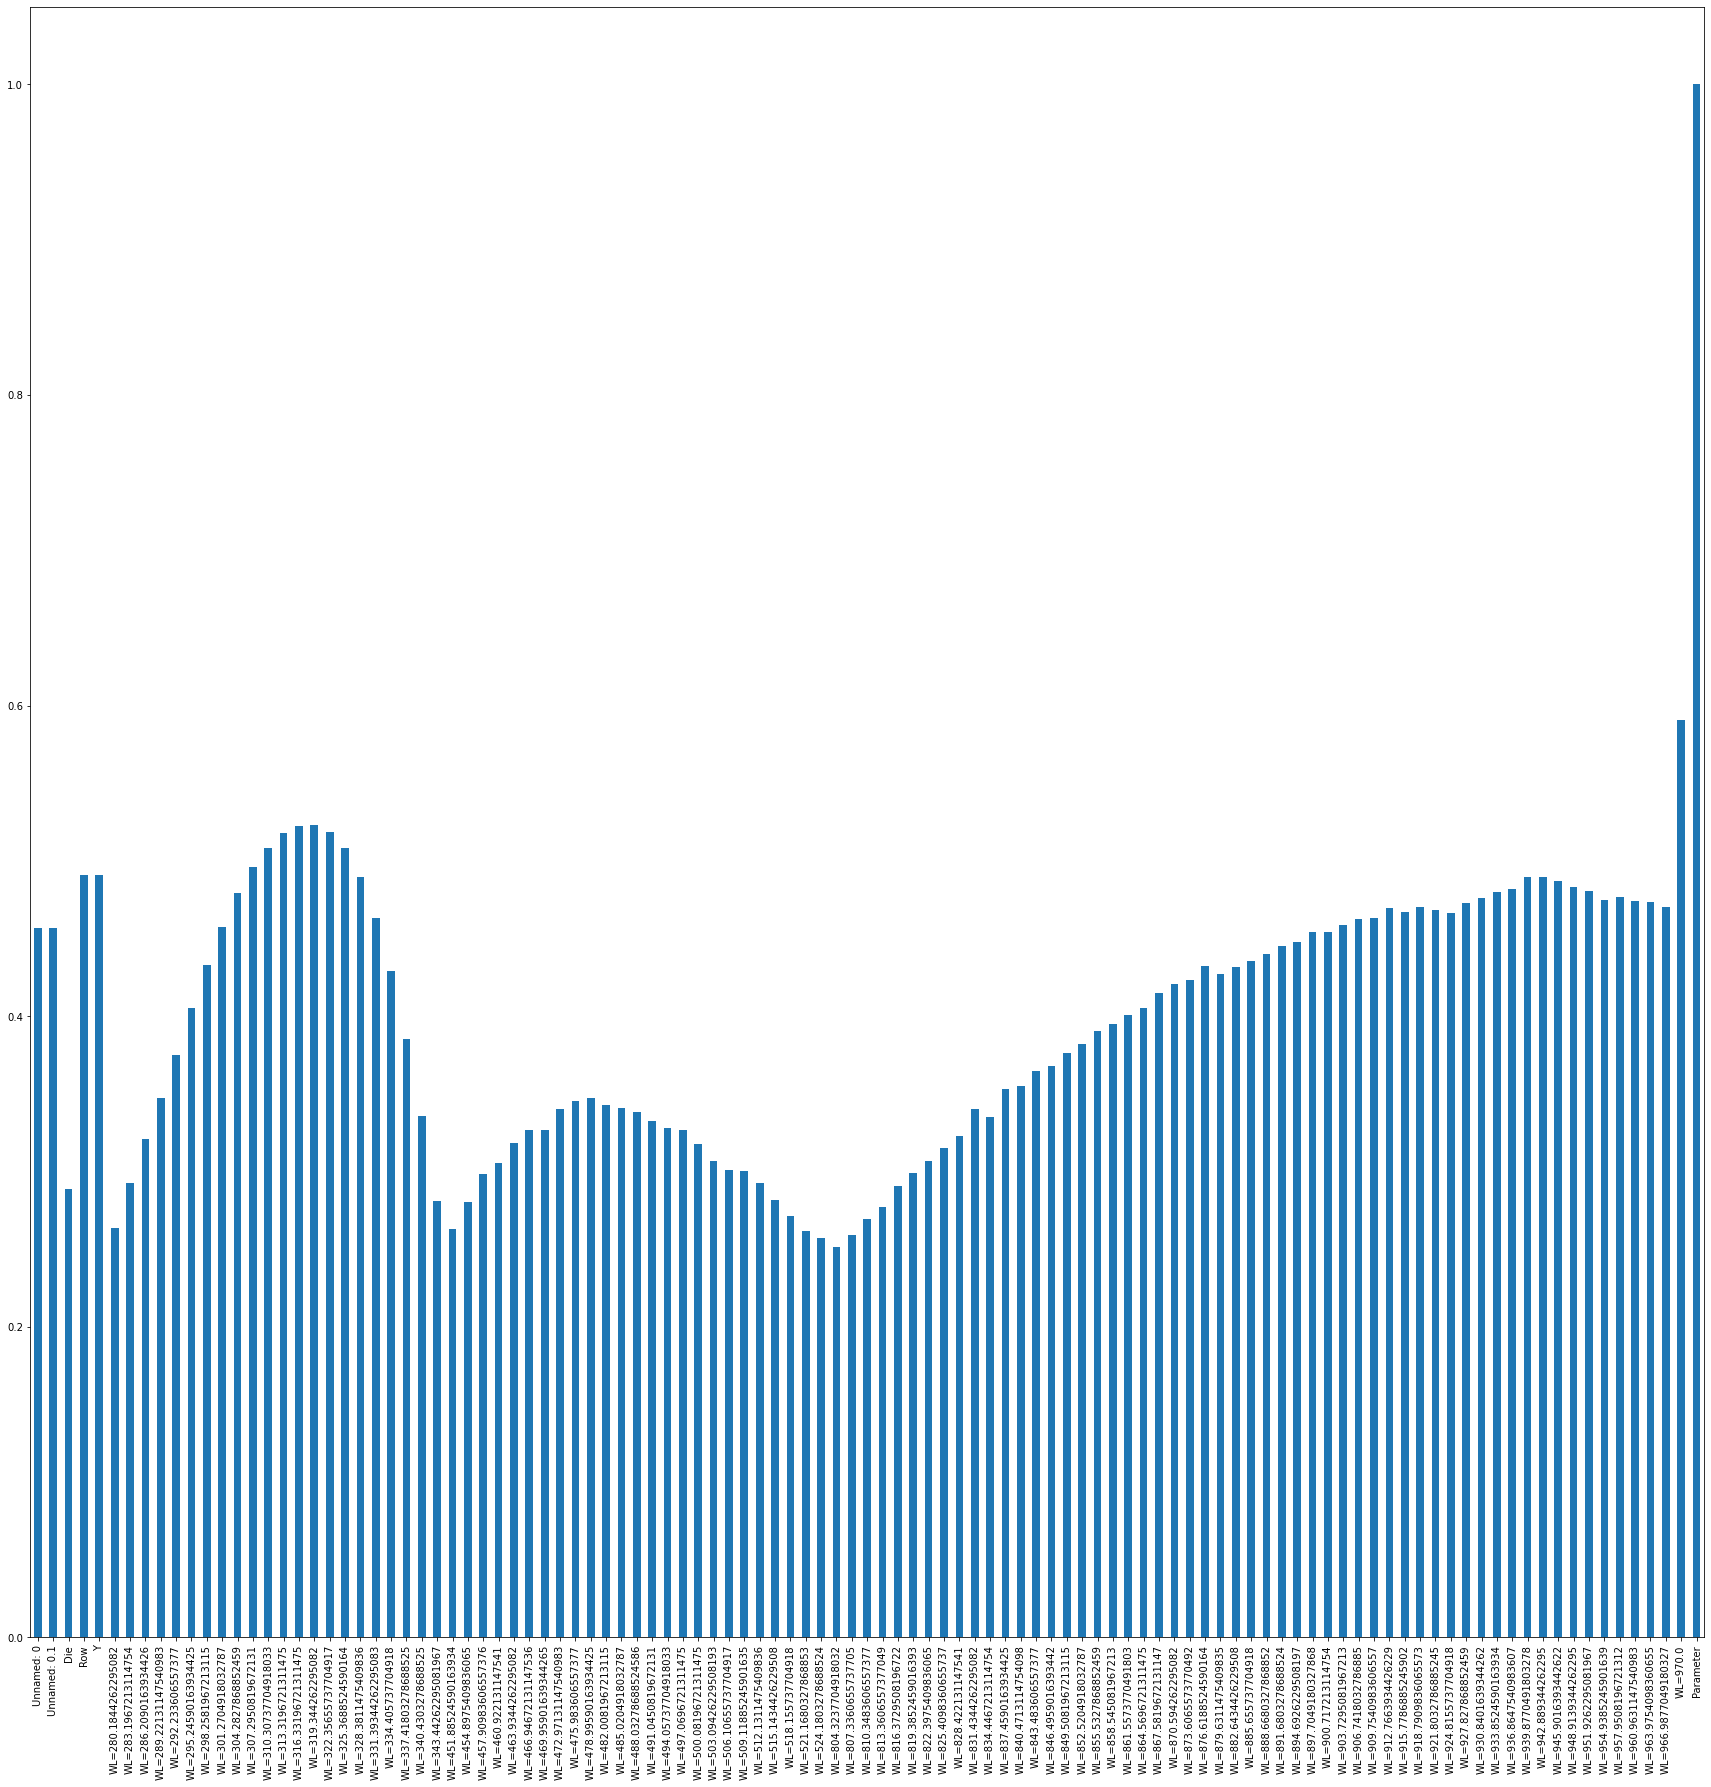

In [5]:
dfcorr_na = dfcorr.isna() # dropping the features that less correlated with the data
dfcorr_na = dfcorr_na.where(dfcorr_na == True)
dfcorr_na = dfcorr_na.dropna()
dfcorr_na
dfcorr= dfcorr.dropna()
dfcorr.abs().plot(kind='bar',figsize=(30,30))

In [6]:
df_clean = df
df_clean = df_clean.drop(dfcorr_na.index, axis=1)
df_clean = df_clean.dropna()
df_clean = df_clean[df_clean['Parameter'].notna()]

In [31]:
x_train, x_test, y_train, y_test = train_test_split(df_clean.iloc[:,7:-1], df_clean.iloc[:,110:111], test_size = 0.2) # splitting train and test using sk learn
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [42]:
predictions = model.predict(x_test)
metrics.mean_squared_error(y_test, predictions)
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1.1955130625315797

Text(0, 0.5, 'intensity')

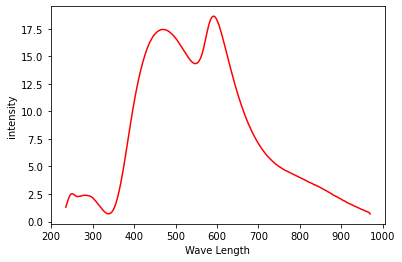

In [33]:
df_1 = df.iloc[:, 9:-1] # plotting the intensity with respect to wave length 
wl=df_1.sum(axis=0)
columns_name = []
# iterating the columns
for col in df_1.columns:
    columns_name.append(col)
    
onlynum = []
for col in columns_name:
    onlynum.append(float(re.sub("[^0-9.]", "", col)))
    
plt.plot(onlynum, wl, 'r')
plt.xlabel("Wave Length")
plt.ylabel("intensity")



In [40]:
 # predicting on training data-set
y_train_predicted = model.predict(x_train)
  
  # predicting on test data-set
y_test_predict = model.predict(x_test)
  
  # evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)
  
  # evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2_test = r2_score(y_test, y_test_predict)
  
print("The Linear Regression model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))
  
print("\n")
  
print("The Linear Regression model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The Linear Regression model performance for the training set
-------------------------------------------
RMSE of training set is 2.8238358232033183e-13
R2 score of training set is 1.0


The Linear Regression model performance for the test set
-------------------------------------------
RMSE of test set is 1.1955130625315797
R2 score of test set is 0.9908419391097325


In [35]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x_train)
pol_reg = LinearRegression()
pol_reg.fit(x_poly, y_train)

LinearRegression()

In [41]:
 # predicting on training data-set
y_train_predicted = pol_reg.predict(x_poly)
  
  # predicting on test data-set
y_test_predict = pol_reg.predict(poly_reg.fit_transform(x_test))
  
  # evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)
  
  # evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2_test = r2_score(y_test, y_test_predict)
  
print("The Polynomial Regression model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))
  
print("\n")
  
print("The Polynomial Regression model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The Polynomial Regression model performance for the training set
-------------------------------------------
RMSE of training set is 9.780753925274032e-13
R2 score of training set is 1.0


The Polynomial Regression model performance for the test set
-------------------------------------------
RMSE of test set is 1.503627837680108
R2 score of test set is 0.9855130957286287
